# Packages/ Imports

In [8]:
'''
# !!! NOTE: Do not have to do this if you update conda env !!! #
Update conda env using the following line in the /environment directory
 
    ` conda env update --file ml_portfolio_opt_env_<OS>.yml --prune `

'''
#%pip install pmdarima

'\n# !!! NOTE: Do not have to do this if you update conda env !!! #\nUpdate conda env using the following line in the /environment directory\n \n    ` conda env update --file ml_portfolio_opt_env_<OS>.ymlcal.yml --prune `\n\n'

In [2]:
import sys
import os

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import yfinance as yf
import statsmodels

# Import libraries for ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

from src.myarima import MyARIMA

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("Finished importing utils!")

Finished importing utils!


# Econonmic Indicators Dataframe

Already updated the csv to main

In [24]:
# import yfinance as yf
# import pandas as pd
# # Define datasets paths
# # works in my computer,but not with repo.
# datasets = [
#     'dataset/econ_data/10yInterestrate_dataset.csv',
#     'dataset/econ_data/GDP_dataset.csv',
#     'dataset/econ_data/Median Consumer Price Index.csv',
#     'dataset/econ_data/personal_saving_rate_dataset.csv',
#     'dataset/econ_data/unemployed_dataset.csv'
# ]
    
# # Create an empty DataFrame to store merged data
# merged_df = pd.DataFrame({'DATE': pd.date_range(start='2018-01-01', end='2023-12-31', freq='MS')})
# merged_df.set_index('DATE', inplace=True)

# # Merge datasets based on 'DATE' column
# for path in datasets:
#     temp_df = pd.read_csv(path)
#     temp_df['DATE'] = pd.to_datetime(temp_df['DATE'])
#     temp_df.set_index('DATE', inplace=True)
    
#     # Merge on 'DATE' column
#     merged_df = pd.merge(merged_df, temp_df, left_index=True, right_index=True, how='left')

# # Fill missing values with values from the previous month
# merged_df = merged_df.reset_index()
# merged_df.ffill(inplace=True)

# #Copy monthly value to convert into daily format
# pivot_df = merged_df.pivot(index='DATE', columns='GDP')

# start_date = pivot_df.index.min() - pd.DateOffset(day=1)
# end_date = pivot_df.index.max() + pd.DateOffset(day=31)
# dates = pd.date_range(start_date, end_date, freq='D')
# dates.name = 'DATE'
# merged_econind_df = pivot_df.reindex(dates, method='ffill').stack('GDP').reset_index()
# merged_econind_df.set_index('DATE', inplace=True)

# # Save the merged DataFrame to a CSV file
# merged_econind_df.to_csv('./dataset/econ_data/combined_econ_data.csv', index=True)

# Stock Ticker Dataframe 

In [5]:
# datasets = [
#     'dataset/stock_data/AAPL_data.csv',
#     'dataset/stock_data/AMD_data.csv',
#     'dataset/stock_data/AMZN_data.csv',
#     'dataset/stock_data/F_data.csv',
#     'dataset/stock_data/GOOG_data.csv', 
#     'dataset/stock_data/INTC_data.csv', 
#     'dataset/stock_data/JPM_data.csv', 
#     'dataset/stock_data/MS_data.csv', 
#     'dataset/stock_data/MSFT_data.csv', 
#     'dataset/stock_data/NVDA_data.csv', 
#     'dataset/stock_data/TSLA_data.csv', 
#     'dataset/stock_data/VOO_data.csv'
# ]

# dfs = []
# for dataset in datasets:
#     temp_df = pd.read_csv(dataset)
#     temp_df['Date'] = pd.to_datetime(temp_df['Date'])
#     temp_df.set_index('Date', inplace=True)
#     dfs.append(temp_df)
# # Merge on 'DATE' column
    
# # Not sure how useful this DF will be, but it exists now
# merged_stocktick_df = pd.concat(dfs)

# merged_stocktick_df.to_csv('./dataset/combined_stock_data.csv', index=True)

Combine stock data

In [6]:
# directory = 'dataset/stock_data'

# dfs = []
# for filename in os.listdir(directory):
#     if filename.endswith(".csv"):
#         df = pd.read_csv(os.path.join(directory, filename))
#         df['Date'] = pd.to_datetime(df['Date'])
#         df.set_index('Date', inplace=True)
        
#         # Check for duplicate index values
#         if df.index.duplicated().any():
#             df = df[~df.index.duplicated()]
#             print(f"Warning: Duplicate index values in file {filename}. Duplicates have been dropped.")
        
#         adj_close_column = df['Adj Close']
#         ticker = df['ticker'].unique()[0]
#         adj_close_column.name = ticker
#         dfs.append(adj_close_column)


# combined_df = pd.concat(dfs, axis=1)
# combined_df.to_csv('./dataset/stock_data/combined_stock_adj_closed.csv', index=True)

## ARIMA 

In [21]:
# Load the dataset for the first ticker
dateparse = lambda dates: pd.to_datetime(dates, format='%Y-%m-%d')
stock_data = pd.read_csv(r'dataset\stock_data\AAPL_data.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
# stock_data = pd.read_csv(r'dataset\stock_data\combined_stock_adj_closed.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.670986,102223600,AAPL
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.663898,118071600,AAPL
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.852768,89738400,AAPL
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.317894,94640000,AAPL
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.164425,82271200,AAPL


In [22]:
# Check the shape of the dataset
print(stock_data.shape)

# Check the start and end date of the dataset
print(stock_data.index.min())
print(stock_data.index.max())

# Duration of stock data
duration = stock_data.index.max() - stock_data.index.min()
print(duration)

(1509, 7)
2018-01-02 00:00:00
2023-12-29 00:00:00
2187 days 00:00:00


In [23]:
# Data Cleaning and Sanity Check

# Check for missing values
print(stock_data.isnull().sum(), '\n')

# Check for duplicate values
print(stock_data.duplicated().sum())

# Describe the dataset
print(stock_data.describe())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
ticker       0
dtype: int64 

0
              Open         High          Low        Close    Adj Close  \
count  1509.000000  1509.000000  1509.000000  1509.000000  1509.000000   
mean    110.326080   111.583562   109.157902   110.428236   108.703985   
std      51.003328    51.520038    50.513390    51.043671    51.349589   
min      35.994999    36.430000    35.500000    35.547501    34.075390   
25%      54.105000    54.794998    53.290001    53.872501    51.655396   
50%     123.660004   124.980003   122.139999   123.540001   121.447418   
75%     152.570007   154.559998   150.800003   152.740005   151.446182   
max     198.020004   199.619995   197.000000   198.110001   197.857529   

             Volume  
count  1.509000e+03  
mean   1.073273e+08  
std    5.513331e+07  
min    2.404830e+07  
25%    7.078370e+07  
50%    9.296430e+07  
75%    1.280440e+08  
max    4.265100e+08  


# Data Visualization

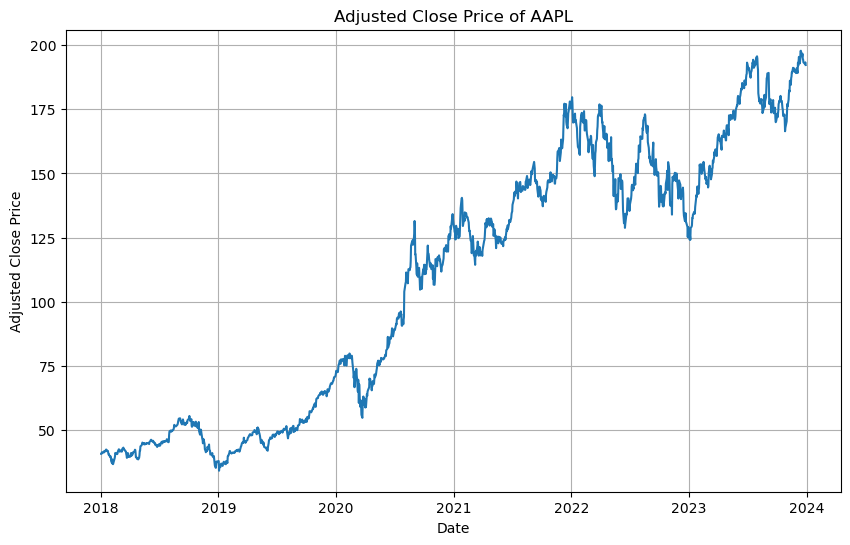

In [24]:
# Plot the adjusted close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.title('Adjusted Close Price of AAPL')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.plot(stock_data['Adj Close'])
plt.show()

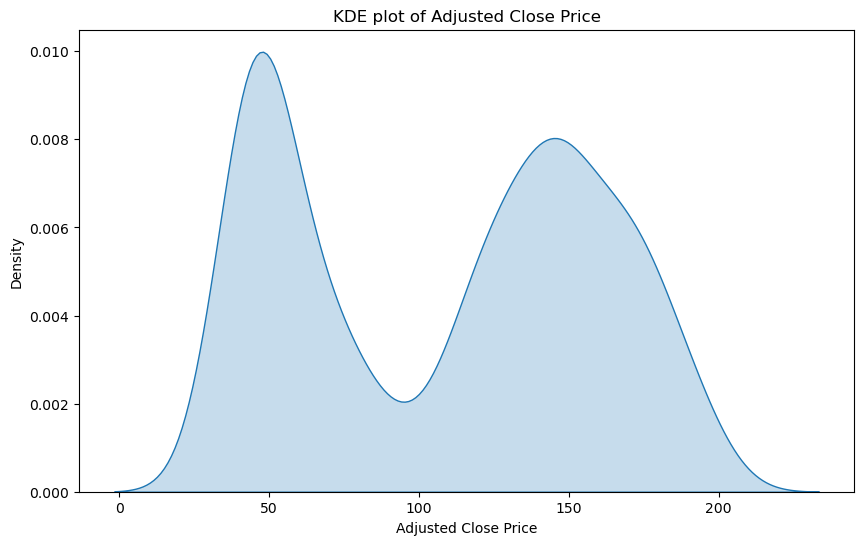

In [25]:
# KDE plot of the adjusted close price
plt.figure(figsize=(10,6))
sns.kdeplot(stock_data['Adj Close'], shade=True)
plt.title('KDE plot of Adjusted Close Price')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Density')
plt.show()

# Check for stationarity

In [28]:
# Check for stationarity using the Augmented Dickey-Fuller test
adj_closed = stock_data['Adj Close']
# columns_except_first = stock_data.iloc[:, 1:]
arima = MyARIMA(adj_closed)

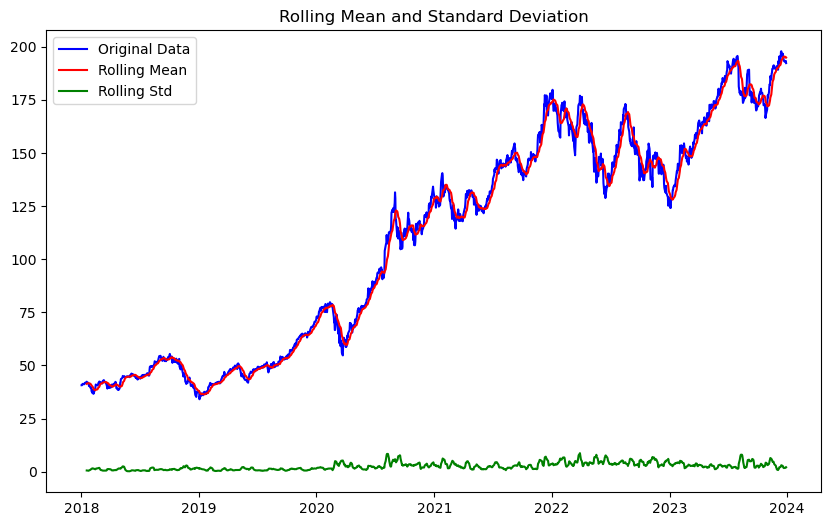

ADF Statistic: -0.5118330349413805
p-value: 0.8896866005103121
Critical Values:
1%: -3.434696697851678
5%: -2.8634597924260303
10%: -2.567792072971565


In [29]:
arima.check_stationarity()

The plot depicts increasing mean and standard deviation. Additionally p-value > 0.05. Hence, the timeseries is not stationary.

Additionally, the test statistics exceeds the critical values. As a result, the data is nonlinear.

<Figure size 1000x600 with 0 Axes>

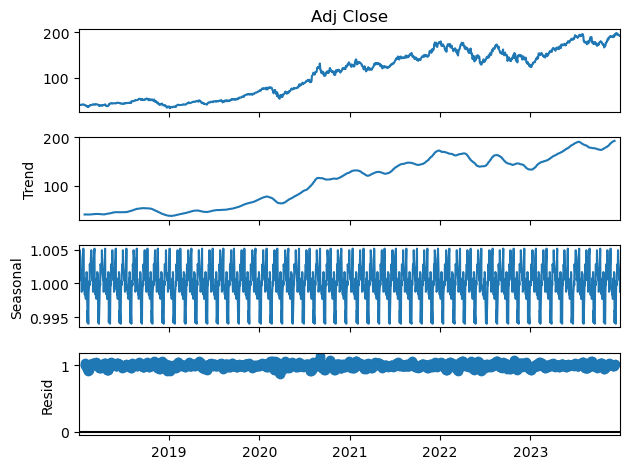

In [11]:
# Decompose the time series
result = seasonal_decompose(adj_closed, model='multiplicative', period=30)
plt.figure(figsize=(10,6))
result.plot()
plt.show()

### Make the time-series stationary

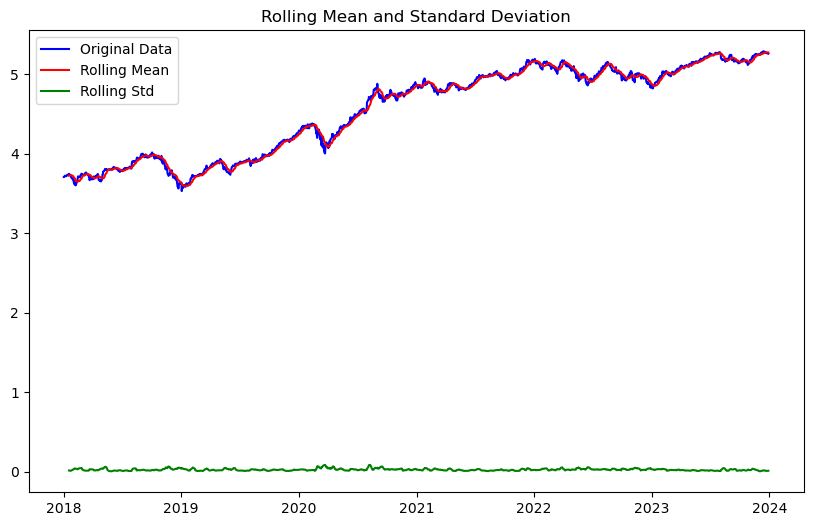

In [12]:
# Taking the log of the time series
log_data = arima.log_data()

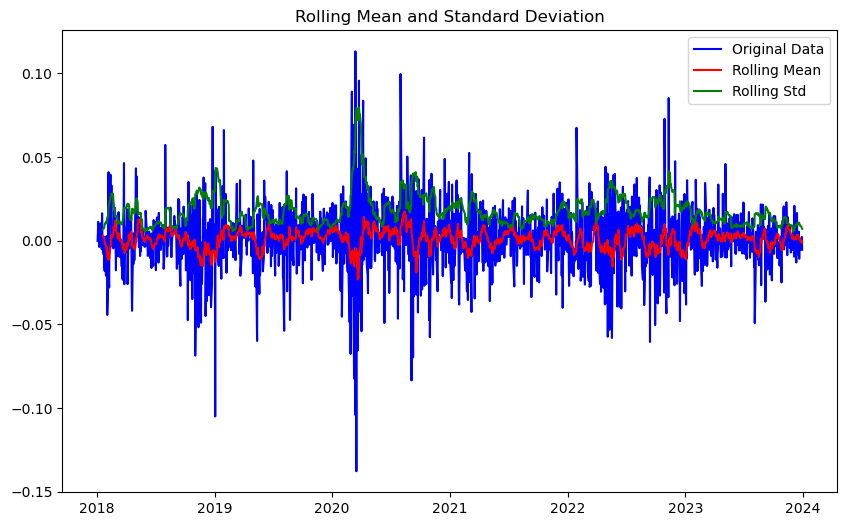

In [13]:
# Differencing the log of the time series
diff_data = arima.difference_data(log_data)

### ACF and PACF plots 

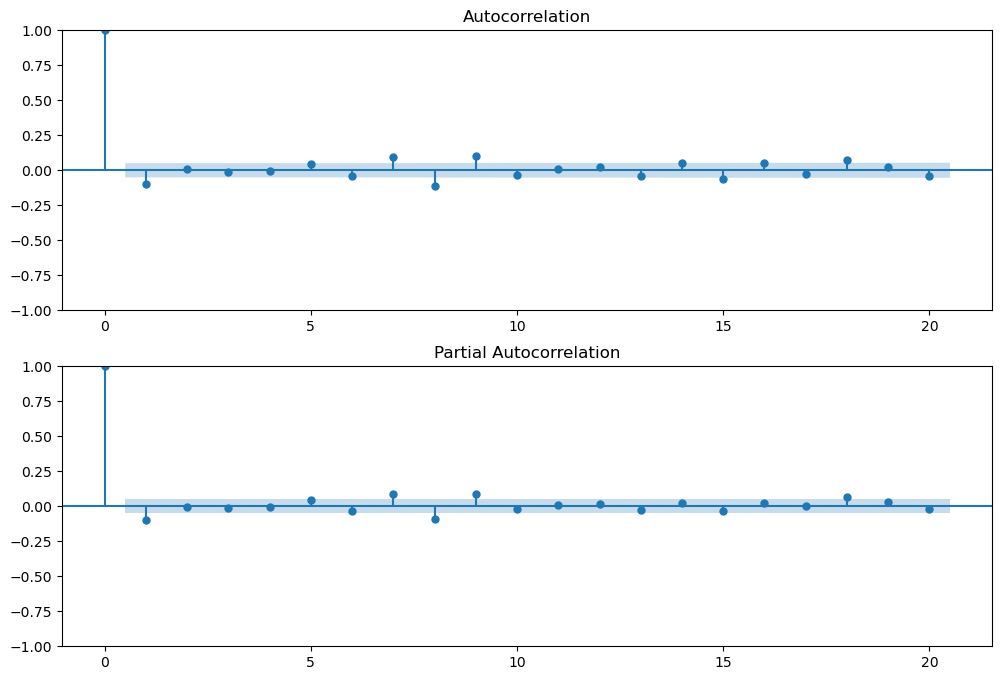

In [14]:
arima.acf_pacf_plots(diff_data)

### Working on combined dataframe

In [3]:
# import pyfolio as pf
# from keras.models import Sequential
# from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [1]:
# import tensorflow as tf
import pyfolio as pf

/opt/conda/envs/ml_portfolio_opt/lib/python3.11/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [4]:
# Load the dataset
dateparse = lambda dates: pd.to_datetime(dates, format='%Y-%m-%d')
portfolio = pd.read_csv(r'dataset/stock_data/combined_stock_adj_closed.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
portfolio.head()

,AAPL,AMD,AMZN,F,GOOG,INTC,JPM,MSFT,MS,NVDA,TSLA,VOO
Date,,,,,,,,,,,,
2018-01-02,40.670986,10.98,59.450500,9.247078,53.250000,39.740650,90.125526,80.080925,43.327942,49.312782,21.368668,222.653656
2018-01-03,40.663898,11.55,60.209999,9.320119,54.124001,38.391907,90.217346,80.453598,43.444176,52.558247,21.150000,223.978333
2018-01-04,40.852768,12.12,60.479500,9.480811,54.320000,37.687866,91.509766,81.161705,44.108334,52.835308,20.974667,224.960541
2018-01-05,41.317894,11.88,61.457001,9.641503,55.111500,37.950832,90.922325,82.167961,44.091740,53.283047,21.105333,226.402283
2018-01-08,41.164425,12.28,62.343498,9.604981,55.347000,37.950832,91.056580,82.251808,43.909084,54.915668,22.427334,226.870895


In [5]:
portfolio_returns = portfolio.pct_change()
portfolio_returns.head()

,AAPL,AMD,AMZN,F,GOOG,INTC,JPM,MSFT,MS,NVDA,TSLA,VOO
Date,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.051913,0.012775,0.007899,0.016413,-0.033939,0.001019,0.004654,0.002683,0.065814,-0.010233,0.005949
2018-01-04,0.004645,0.049351,0.004476,0.017241,0.003621,-0.018338,0.014326,0.008801,0.015288,0.005272,-0.008290,0.004385
2018-01-05,0.011385,-0.019802,0.016163,0.016949,0.014571,0.006977,-0.006419,0.012398,-0.000376,0.008474,0.006230,0.006409
2018-01-08,-0.003714,0.033670,0.014425,-0.003788,0.004273,0.000000,0.001477,0.001020,-0.004143,0.030641,0.062638,0.002070


In [6]:
#Calculating volatility using covariance matrix
covariance = portfolio_returns.cov()*252
display(covariance)

,AAPL,AMD,AMZN,F,GOOG,INTC,JPM,MSFT,MS,NVDA,TSLA,VOO
AAPL,0.100343,0.095387,0.069905,0.048942,0.066677,0.067287,0.044472,0.071554,0.057597,0.103720,0.093861,0.051993
AMD,0.095387,0.305657,0.107345,0.070291,0.091718,0.097917,0.053576,0.095623,0.075245,0.202689,0.144094,0.068502
AMZN,0.069905,0.107345,0.125078,0.041140,0.074557,0.061291,0.033117,0.074206,0.046355,0.110402,0.095402,0.047981
F,0.048942,0.070291,0.041140,0.168434,0.048000,0.053630,0.071125,0.045274,0.082530,0.080443,0.086874,0.050236
GOOG,0.066677,0.091718,0.074557,0.048000,0.097505,0.063175,0.043226,0.071861,0.054728,0.100883,0.079215,0.049217
INTC,0.067287,0.097917,0.061291,0.053630,0.063175,0.144762,0.052820,0.068119,0.064045,0.107111,0.083835,0.052451
JPM,0.044472,0.053576,0.033117,0.071125,0.043226,0.052820,0.092977,0.042804,0.086771,0.060156,0.053640,0.046443
MSFT,0.071554,0.095623,0.074206,0.045274,0.071861,0.068119,0.042804,0.090745,0.055660,0.107548,0.085291,0.051599
MS,0.057597,0.075245,0.046355,0.082530,0.054728,0.064045,0.086771,0.055660,0.116534,0.084523,0.070204,0.054730
NVDA,0.103720,0.202689,0.110402,0.080443,0.100883,0.107111,0.060156,0.107548,0.084523,0.263891,0.153912,0.074399


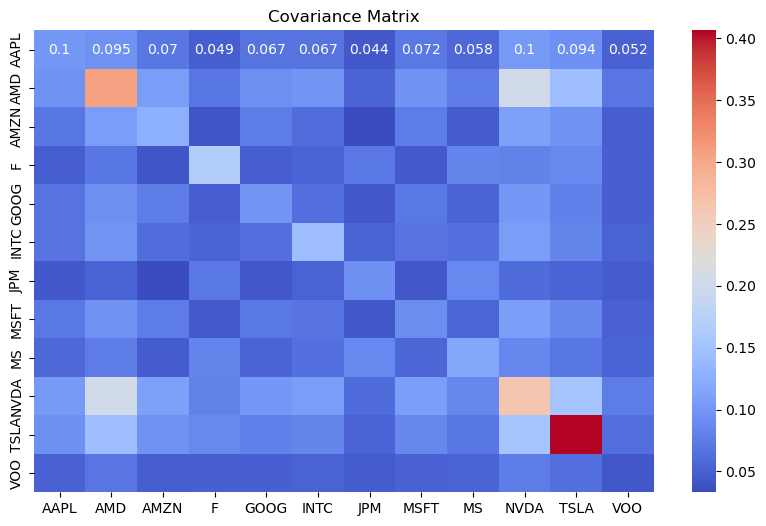

In [7]:
# Heatmap of the covariance matrix
plt.figure(figsize=(10,6))
sns.heatmap(covariance, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix')
plt.show()

In [8]:
# Allocate equal weights to all stocks

weights = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
portfolio_variance = np.transpose(weights) @ covariance @ weights
print(f'Portfolio Variance: {portfolio_variance}')

Portfolio Variance: 0.7300145604487224


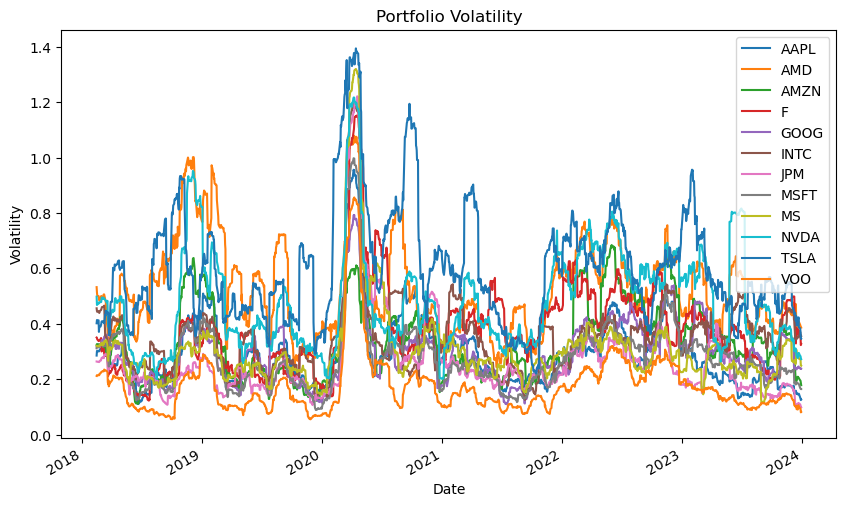

In [9]:
# Calculate the portfolio volatility

windowed = portfolio_returns.rolling(30)
volatility = windowed.std() * np.sqrt(252)
volatility.plot(figsize=(10,6))
plt.title('Portfolio Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

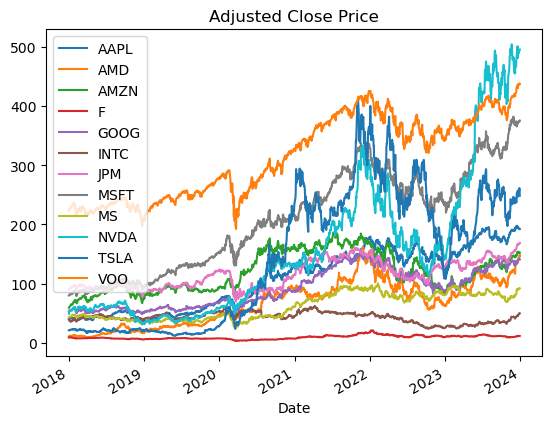

In [10]:
# Plot the adjusted close price
portfolio.plot(title='Adjusted Close Price')
plt.show()

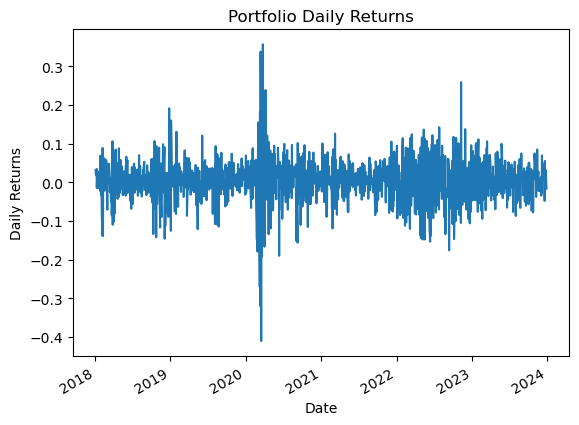

In [11]:
# Calculate the daily returns
asset_returns = portfolio.pct_change()
portfolio_returns = asset_returns@weights

# Plot the daily returns
portfolio_returns.plot().set_ylabel('Daily Returns')
plt.title('Portfolio Daily Returns')
plt.show()

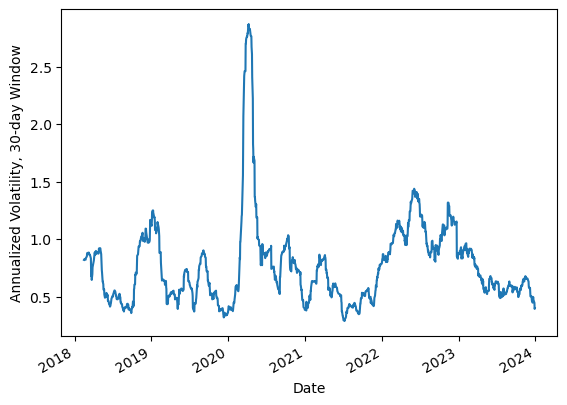

In [12]:
# Calculate the 30-day rolling window of portfolio returns
returns_windowed= portfolio_returns.rolling(30)

# Compute the annualized volatility series
volatility_series = returns_windowed.std()*np.sqrt(252)

# Plot the portfolio volatility
volatility_series.plot().set_ylabel("Annualized Volatility, 30-day Window")
plt.show()

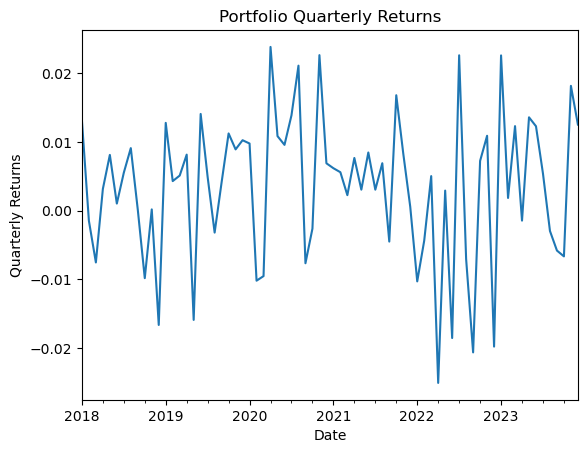

In [13]:
# Convert daily returns to quarterly average returns
quarterly_returns = portfolio_returns.resample('MS').mean().dropna()
quarterly_returns.plot().set_ylabel("Quarterly Returns")
plt.title('Portfolio Quarterly Returns')
plt.show()

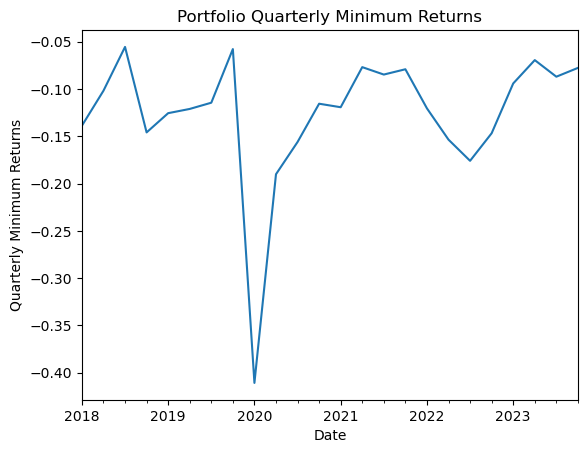

In [14]:
# Transform daily portfolio_returns returns into quarterly minimum returns
quarterly_min_returns = portfolio_returns.resample('Q').min().dropna()
quarterly_min_returns.plot().set_ylabel("Quarterly Minimum Returns")
plt.title('Portfolio Quarterly Minimum Returns')
plt.show()